# Linear Regression Approach

### Import Libraries

In [159]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Importing Data and Checking out.

In [160]:
df = pd.read_csv('new_data_features.csv')

In [161]:
df.head()

,Unique Junction ID,JCR ID,Latitude,Longitude,maid,male,female,high,medium,low,...,Weekday - Total Car,Weekday - Hatchback,Weekday - Sedan,Weekday - SUV,City,Weekday - Sum,mean_maid,std_maid,mean_weekday_sum,std_weekday_sum
0,J1,JCR1,23.038572,72.511947,223.0,188.0,35.0,17.0,141.0,65.0,...,38475.0,28890.0,5895.0,3690.0,Ahmedabad,99090.0,1130.0,286.818584,48271.5,16070.220727
1,J1,JCR1,23.038572,72.511947,223.0,188.0,35.0,17.0,141.0,65.0,...,47511.0,28350.0,12861.0,6299.0,Ahmedabad,142270.0,1130.0,286.818584,48271.5,29724.935664
2,J1,JCR2,23.038161,72.513152,1772.0,1404.0,368.0,677.0,395.0,700.0,...,11250.0,8550.0,2025.0,675.0,Ahmedabad,26280.0,1130.0,203.018226,48271.5,6954.322916
3,J1,JCR2,23.038161,72.513152,1772.0,1404.0,368.0,677.0,395.0,700.0,...,10238.0,7350.0,2100.0,788.0,Ahmedabad,30709.0,1130.0,203.018226,48271.5,5553.750141
4,J1,JCR3,23.039939,72.512316,74.0,63.0,11.0,3.0,41.0,30.0,...,9540.0,7740.0,945.0,855.0,Ahmedabad,24120.0,1130.0,333.936521,48271.5,7637.374891


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4566 entries, 0 to 4565
Data columns (total 21 columns):
Unique Junction ID     4566 non-null object
JCR ID                 4566 non-null object
Latitude               4566 non-null float64
Longitude              4566 non-null float64
maid                   4566 non-null float64
male                   4566 non-null float64
female                 4566 non-null float64
high                   4566 non-null float64
medium                 4566 non-null float64
low                    4566 non-null float64
Peak/ Non-Peak         4566 non-null float64
Weekday - Total Car    4566 non-null float64
Weekday - Hatchback    4566 non-null float64
Weekday - Sedan        4566 non-null float64
Weekday -  SUV         4566 non-null float64
City                   4566 non-null object
Weekday - Sum          4566 non-null float64
mean_maid              4566 non-null float64
std_maid               4566 non-null float64
mean_weekday_sum       4566 non-null floa

In [163]:
df.isnull().sum()

Unique Junction ID     0
JCR ID                 0
Latitude               0
Longitude              0
maid                   0
male                   0
female                 0
high                   0
medium                 0
low                    0
Peak/ Non-Peak         0
Weekday - Total Car    0
Weekday - Hatchback    0
Weekday - Sedan        0
Weekday -  SUV         0
City                   0
Weekday - Sum          0
mean_maid              0
std_maid               0
mean_weekday_sum       0
std_weekday_sum        0
dtype: int64

In [164]:
df.describe()

,Latitude,Longitude,maid,male,female,high,medium,low,Peak/ Non-Peak,Weekday - Total Car,Weekday - Hatchback,Weekday - Sedan,Weekday - SUV,Weekday - Sum,mean_maid,std_maid,mean_weekday_sum,std_weekday_sum
count,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000,4566.000000
mean,21.898360,78.110619,1296.159001,977.246167,318.910206,161.069645,624.151555,510.826982,0.500000,9357.106001,3825.645861,3469.204117,2062.257556,31002.376916,1296.159001,363.676548,31002.376916,5823.473187
std,5.836152,4.933087,3091.894623,2275.544221,864.006353,463.373730,1563.183620,1243.040444,0.500055,11876.158405,4955.885468,4925.397104,2810.563417,30877.669890,1657.606942,791.739261,16028.625208,6135.348096
min,9.894260,70.777553,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.750000,0.063246,5759.000000,8.380036
25%,18.943673,73.826853,93.250000,70.000000,19.000000,4.000000,34.250000,39.000000,0.000000,2745.000000,1103.000000,840.000000,540.000000,12234.000000,363.650000,66.238946,19761.875000,2032.593495
50%,22.304439,77.211134,381.000000,294.000000,73.000000,22.000000,151.000000,134.000000,0.500000,5460.000000,2160.000000,1890.000000,1125.000000,21106.500000,819.200000,174.367990,27915.500000,3961.148054
75%,26.873228,80.246604,1396.750000,1064.500000,320.000000,118.000000,636.500000,503.750000,1.000000,10911.750000,4463.000000,3880.500000,2415.000000,35643.250000,1708.400000,408.132308,40713.500000,6999.543487
max,30.937322,91.800088,91058.000000,66191.000000,24867.000000,11194.000000,45860.000000,34004.000000,1.000000,147629.000000,59167.000000,58012.000000,37694.000000,274833.000000,24416.500000,23561.328279,104840.000000,62202.946104


In [165]:
df.columns

Index(['Unique Junction ID', 'JCR ID', 'Latitude', 'Longitude', 'maid', 'male',
       'female', 'high', 'medium', 'low', 'Peak/ Non-Peak',
       'Weekday - Total Car', 'Weekday - Hatchback', 'Weekday - Sedan',
       'Weekday -  SUV', 'City', 'Weekday - Sum', 'mean_maid', 'std_maid',
       'mean_weekday_sum', 'std_weekday_sum'],
      dtype='object')

## Exploratory Data Analysis for House Price Prediction

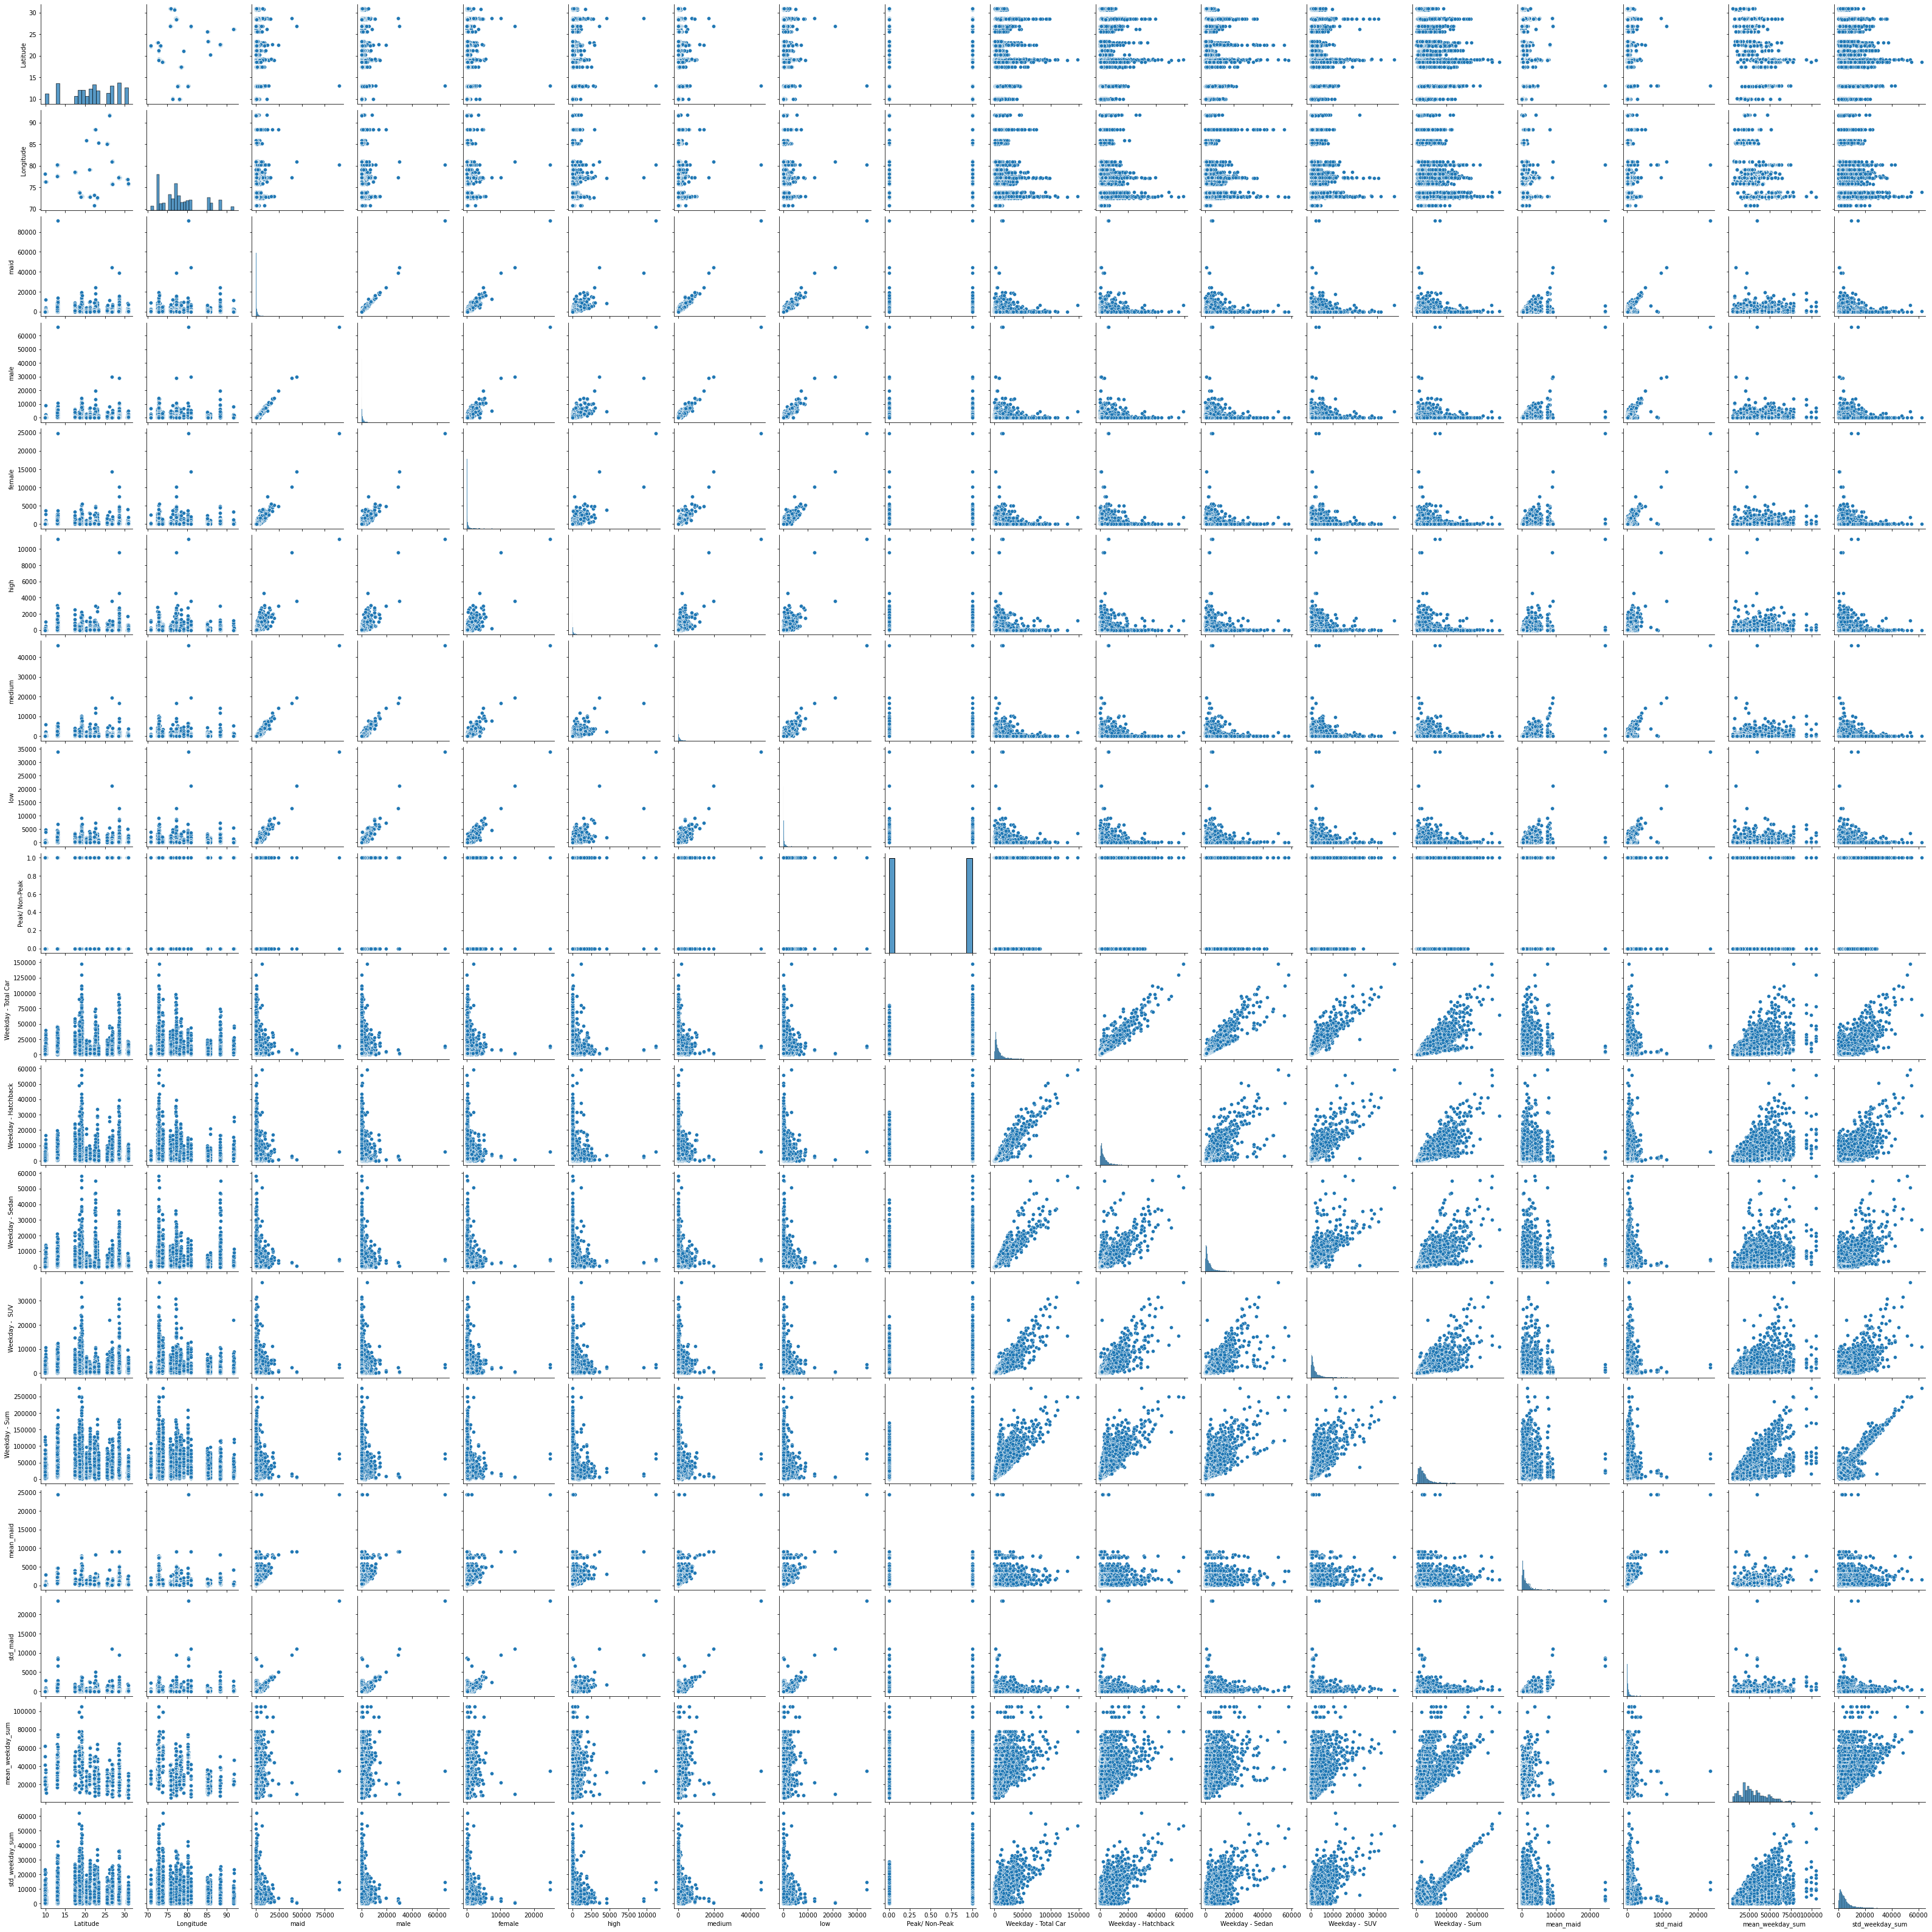

In [166]:
sns.pairplot(df)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Weekday - Sum', ylabel='Density'>

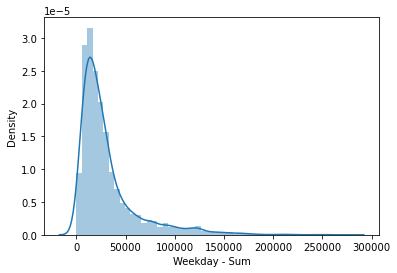

In [167]:
sns.distplot(df['Weekday - Sum'])

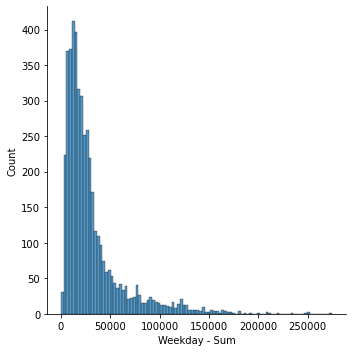

In [168]:
sns.displot(df['Weekday - Sum'])

<AxesSubplot:>

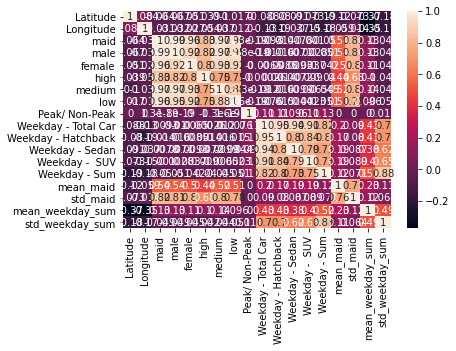

In [169]:
sns.heatmap(df.corr(), annot=True)

## Training a Linear Regression Model

### X and y List

In [170]:
df.columns

Index(['Unique Junction ID', 'JCR ID', 'Latitude', 'Longitude', 'maid', 'male',
       'female', 'high', 'medium', 'low', 'Peak/ Non-Peak',
       'Weekday - Total Car', 'Weekday - Hatchback', 'Weekday - Sedan',
       'Weekday -  SUV', 'City', 'Weekday - Sum', 'mean_maid', 'std_maid',
       'mean_weekday_sum', 'std_weekday_sum'],
      dtype='object')

In [171]:
X = df[['male','female','high','medium','low','Longitude','Peak/ Non-Peak','Latitude','Weekday - Total Car', 'Weekday - Hatchback', 'Weekday - Sedan',
               'Weekday -  SUV']]

y = df['Weekday - Sum']

### Split Data into Train, Test

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the LinearRegression Model

In [174]:
from sklearn.linear_model import LinearRegression

In [175]:
lm = LinearRegression()

In [176]:
lm.fit(X_train,y_train)

LinearRegression()

## LinearRegression Model Evaluation

In [177]:
print(lm.intercept_)

52078.204702222756


In [178]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
male,35.312340
female,35.919603
high,-36.792015
medium,-35.704331
low,-35.993064
Longitude,-321.357739
Peak/ Non-Peak,3125.813736
Latitude,-677.249728
Weekday - Total Car,8084.829578
Weekday - Hatchback,-8082.249427


## Predictions from our Linear Regression Model

In [179]:
predictions = lm.predict(X_test)

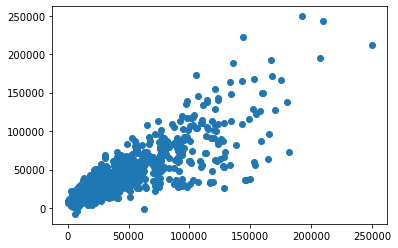

In [180]:
plt.scatter(y_test,predictions)

In the above scatter plot, we see data is in line shape, which means our model has done good predictions.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


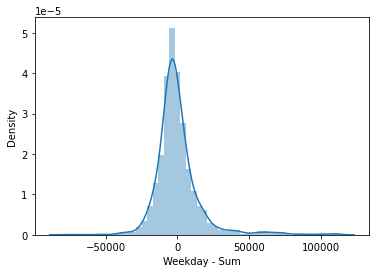

In [181]:
sns.distplot((y_test-predictions),bins=50);

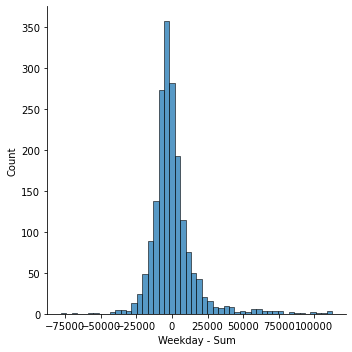

In [182]:
sns.displot((y_test-predictions),bins=50);

In the above histogram plot, we see data is in bell shape (Normally Distributed), which means our model has done good predictions.

## Regression Evaluation Metrics

In [183]:
from sklearn import metrics

In [184]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 9976.180513689782
MSE: 263564845.40630436
RMSE: 16234.680329661694
